In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder
import time

In [142]:
x=pd.read_csv('data.csv',index_col='ID')

In [143]:
x['Loại hình nhà ở'] = x['Loại hình nhà ở'].map({'Nhà mặt phố, mặt tiền':2,'Nhà ngõ, hẻm':0,'Nhà phố liền kề':1,'Nhà biệt thự':3})
x['Giấy tờ pháp lý'] = x['Giấy tờ pháp lý'].map({'Đã có sổ':2,'Giấy tờ khác':0,'Đang chờ sổ':1})

In [144]:
def Explore(df):
        print('DataFrame Shape :')
        display(df.shape)
        print('DataFrame examples : \n')
        display(df.head())
        print("information about Dataset")
        display(df.info())
        print('DataFrame Description : \n')
        display(df.describe().T)

Explore(x)

DataFrame Shape :


(53219, 7)

DataFrame examples : 



,Giá,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số phòng ngủ,Diện tích
ID,,,,,,,
1,28.344,Huyện Ba Vì,Xã Phú Sơn,2,2,2,882.0
2,12.000,Huyện Chương Mỹ,Thị trấn Chúc Sơn,2,2,2,68.0
3,14.000,Huyện Chương Mỹ,Thị trấn Chúc Sơn,2,2,1,200.0
4,15.000,Huyện Chương Mỹ,Xã Phụng Châu,0,2,2,46.0
5,15.000,Huyện Chương Mỹ,Xã Phụng Châu,0,2,2,46.0


information about Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53219 entries, 1 to 53219
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Giá              53219 non-null  float64
 1   Quận             53219 non-null  object 
 2   Phường           53219 non-null  object 
 3   Loại hình nhà ở  53219 non-null  int64  
 4   Giấy tờ pháp lý  53219 non-null  int64  
 5   Số phòng ngủ     53219 non-null  int64  
 6   Diện tích        53219 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.2+ MB


None

DataFrame Description : 



,count,mean,std,min,25%,50%,75%,max
Giá,53219.0,104.201228,78.848058,11.0,72.0,89.0,111.0,2000.0
Loại hình nhà ở,53219.0,0.492381,0.869103,0.0,0.0,0.0,1.0,3.0
Giấy tờ pháp lý,53219.0,1.980909,0.176859,0.0,2.0,2.0,2.0,2.0
Số phòng ngủ,53219.0,3.872564,1.514085,1.0,3.0,4.0,4.0,11.0
Diện tích,53219.0,46.825876,30.128599,9.0,34.0,40.0,50.0,1378.0


In [145]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
df1 = pd.DataFrame({'Quận':x['Quận']})
df2 = pd.DataFrame({'Phường':x['Phường']})
le = preprocessing.LabelEncoder()
df1['Quận_encoded'] = le.fit_transform(x['Quận'])
df2['Phường_encoded'] = le.fit_transform(x['Phường'])

In [146]:
x['Quận'] = df1.loc[:,'Quận_encoded']
x['Phường'] = df2.loc[:,'Phường_encoded']

In [147]:
def Explore(df):
        print('DataFrame Shape : \n')
        display(df.shape)
        print('DataFrame examples : \n')
        display(df.head())
        print("information about Dataset")
        display(df.info())
        print('DataFrame Description : \n')
        display(df.describe().T)

Explore(x)

DataFrame Shape : 



(53219, 7)

DataFrame examples : 



,Giá,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số phòng ngủ,Diện tích
ID,,,,,,,
1,28.344,0,229,2,2,2,882.0
2,12.000,1,169,2,2,2,68.0
3,14.000,1,169,2,2,1,200.0
4,15.000,1,232,0,2,2,46.0
5,15.000,1,232,0,2,2,46.0


information about Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53219 entries, 1 to 53219
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Giá              53219 non-null  float64
 1   Quận             53219 non-null  int32  
 2   Phường           53219 non-null  int32  
 3   Loại hình nhà ở  53219 non-null  int64  
 4   Giấy tờ pháp lý  53219 non-null  int64  
 5   Số phòng ngủ     53219 non-null  int64  
 6   Diện tích        53219 non-null  float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 2.8 MB


None

DataFrame Description : 



,count,mean,std,min,25%,50%,75%,max
Giá,53219.0,104.201228,78.848058,11.0,72.0,89.0,111.0,2000.0
Quận,53219.0,20.836355,4.181437,0.0,18.0,21.0,24.0,27.0
Phường,53219.0,86.724253,53.852455,0.0,42.0,76.0,132.0,279.0
Loại hình nhà ở,53219.0,0.492381,0.869103,0.0,0.0,0.0,1.0,3.0
Giấy tờ pháp lý,53219.0,1.980909,0.176859,0.0,2.0,2.0,2.0,2.0
Số phòng ngủ,53219.0,3.872564,1.514085,1.0,3.0,4.0,4.0,11.0
Diện tích,53219.0,46.825876,30.128599,9.0,34.0,40.0,50.0,1378.0


In [148]:
target = x['Giá']
features = list(set(list(x.columns)) - set(target))
pd.DataFrame(x.corr().iloc[1:,0])
correlation = x.corr().iloc[1:,0].values
column_selected = [i for i in x.columns if (i != 'Giá')]
column_selected
features_importances_corr = pd.DataFrame({'Biến độc lập': x[column_selected].columns[0:len(x[column_selected])-1], 'Hệ số tương quan Pearson với biến mục tiêu': correlation})
features_importances_corr.reindex(features_importances_corr['Hệ số tương quan Pearson với biến mục tiêu'].abs().sort_values(ascending=False).index)

,Biến độc lập,Hệ số tương quan Pearson với biến mục tiêu
2,Loại hình nhà ở,0.294416
4,Số phòng ngủ,0.227995
5,Diện tích,0.145089
1,Phường,-0.057552
0,Quận,0.051610
3,Giấy tờ pháp lý,0.018013


<Axes: ylabel='Biến độc lập'>

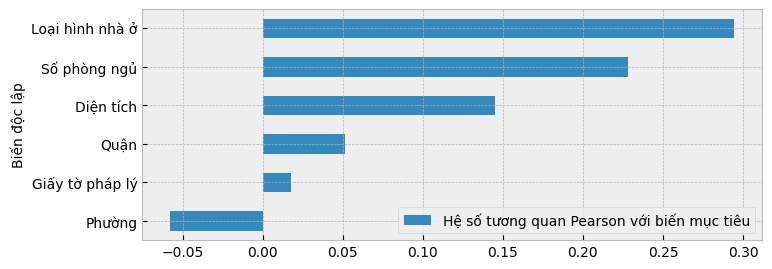

In [149]:
features_importances_corr.sort_values(by = ['Hệ số tương quan Pearson với biến mục tiêu']).plot(figsize=(8,3), x="Biến độc lập", y = "Hệ số tương quan Pearson với biến mục tiêu", kind="barh")

In [151]:
target = ['Giá']
features = list(set(list(x.columns)) - set(target))

In [154]:
X = x[features].values
y = x[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)

C:\Users\kateo\AppData\Local\Temp\ipykernel_30880\2159648690.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [125]:
import math
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
def evaluate_performance(test,prediction):
    RMSE = round(math.sqrt(mean_squared_error(test,prediction)),2)
    MSE = round(mean_squared_error(test,prediction),2)
    MAPE = round(mean_absolute_percentage_error(test,prediction),2)
    MAE = round(mean_absolute_error(test,prediction),2)
    R2 = round(r2_score(test,prediction),2)
    indicators = ['RMSE','MSE','MAPE','MAE','R2']
    results = [RMSE,MSE,MAPE,MAE,R2]
    return pd.DataFrame({'Các chỉ số':indicators,'Kết quả':results})

In [126]:
perf1 = evaluate_performance(y_test,rf_y_pred)

In [127]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
coefficients = lr.coef_
pd.DataFrame({'Biến độc lập':features, 'Hệ số hồi quy':coefficients[0]})

,Biến độc lập,Hệ số hồi quy
0,Loại hình nhà ở,23.108709
1,Quận,0.871498
2,Số phòng ngủ,8.557410
3,Phường,-0.055415
4,Diện tích,0.060822
5,Giấy tờ pháp lý,10.523737


In [128]:
perf2 = evaluate_performance(y_test,lr_y_pred)

In [129]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
xg_y_pred=xg.predict(X_test)


In [130]:
perf3 = evaluate_performance(y_test,xg_y_pred)

In [131]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('lr', lr), ('xg', xg)])
vr.fit(X_train, y_train)
vr_y_pred = vr.predict(X_test)

c:\Users\kateo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
perf4 = evaluate_performance(y_test,vr_y_pred)